2.1度数分布と確率分布

In [1]:
import pandas as pd
data=pd.read_csv("sensor_data_200.txt",delimiter=" ", header=None,names=("date","time","ir","lidar"))
import matplotlib.pyplot as plt

In [11]:
print(data)


           date    time   ir  lidar
0      20180122   95819  305    214
1      20180122   95822  299    211
2      20180122   95826  292    199
3      20180122   95829  321    208
4      20180122   95832  298    212
...         ...     ...  ...    ...
58983  20180124  120023  313    208
58984  20180124  120026  297    200
58985  20180124  120030  323    204
58986  20180124  120033  326    207
58987  20180124  120036  321    208

[58988 rows x 4 columns]


In [16]:
print(data["lidar"][0:5])


0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


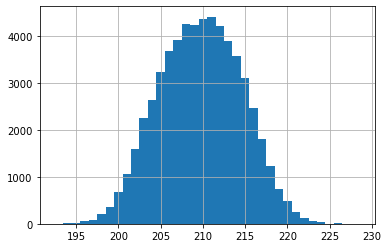

In [17]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align="left")
plt.show()

In [4]:
mean1=sum(data["lidar"].values/len(data["lidar"].values))
print(mean1)

209.73713297620998


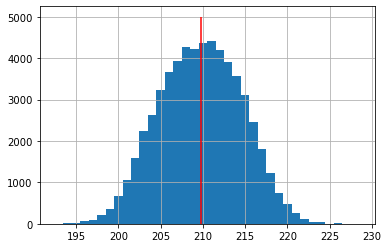

In [5]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align="left")
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [12]:
#定義から標準分散
zs=data["lidar"].values
mean=sum(zs)/len(zs)
diff_square=[(z-mean)**2 for z in zs]

sampling_var=sum(diff_square)/(len(zs))
unbiased_var=sum(diff_square)/(len(zs)-1)

print(sampling_var)
print(unbiased_var)

#Pandas
pandas_sampling_var=data["lidar"].var(ddof=0)
pandas_default_var=data["lidar"].var()
print(pandas_sampling_var)
print(pandas_default_var)

#NumPy
import numpy as np
numpy_default_var=np.var(data["lidar"])
numpy_unbiased_var=np.var(data["lidar"],ddof=1)
print(numpy_default_var)
print(numpy_unbiased_var)



23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441


In [13]:
import math
#定義
stddev1=math.sqrt(sampling_var)
stddev2=math.sqrt(unbiased_var)
#Pandas
pandas_stddey=data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddey)


4.838151482774605
4.83819249292072
4.83819249292072


In [3]:
freqs=pd.DataFrame(data["lidar"].value_counts())
#freqs.transpose()